In [1]:
#!pip install pycaret==3.0
#!pip install requests

In [2]:
import pycaret
pycaret.__version__

'3.0.0'

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 2

In [4]:
from pycaret.regression import *
s2 = setup(data, target = 'charges',
           normalize = True,
           polynomial_features = True,
           #silent=True,
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,335
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2867.7714,26026528.4690,5101.6202,0.8474,0.4305,0.2634
1,2581.5549,13126386.9122,3623.0356,0.8686,0.3549,0.3167
2,2273.2440,18182583.0366,4264.1040,0.8784,0.3069,0.1979
3,2421.5561,14174067.7853,3764.8463,0.8932,0.3470,0.2612
4,2671.0766,22590889.4922,4752.9874,0.7954,0.4051,0.2931
5,2621.2275,17745802.9439,4212.5768,0.8538,0.3913,0.2675
6,2175.6441,12030879.3067,3468.5558,0.9192,0.3635,0.2200
7,2977.4862,28800671.1216,5366.6257,0.8240,0.3713,0.2472
8,3412.9917,30861174.3500,5555.2835,0.7992,0.3770,0.2335


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

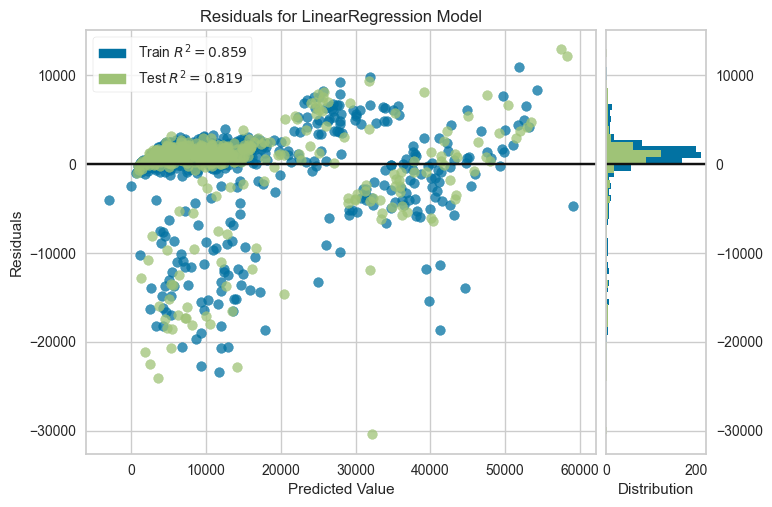

In [6]:
plot_model(lr)

In [7]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\usuario\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  Transforme...
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                        

In [8]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [9]:
deployment_28042020

Pipeline(memory=FastMemory(location=C:\Users\usuario\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 Transforme...
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])

### Execute the Application

In [10]:
!streamlit run app.py

^C


#### import requests

In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())